**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import random

In [2]:
data = np.load('/content/mnist.npz')
print(type(data))
for i,j in data.items():
    print(i,j)

<class 'numpy.lib.npyio.NpzFile'>
x_test [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 

In [3]:
print("x_train:",len(data["x_train"]))
print("y_train:",len(data["y_train"]))
print("x_test:",len(data["x_test"]))
print("y_test:",len(data["y_test"]))

x_train: 60000
y_train: 60000
x_test: 10000
y_test: 10000


In [4]:
d1=data["x_train"]
d2=data["y_train"]
matrix=[]
y_training=[]
for i in range(60000):
    if(d2[i]==0 or d2[i]==1 or d2[i]==2):
        matrix.append(d1[i])
        y_training.append(d2[i])

y_training=np.array(y_training)
matrix=np.array(matrix)
print("Shape of data matrix:",(matrix).shape)
reshaped_matrix=matrix.reshape(18623,28*28)
print("Shape of reshaped matrix:",(reshaped_matrix).shape)
print(matrix)
print(reshaped_matrix)

Shape of data matrix: (18623, 28, 28)
Shape of reshaped matrix: (18623, 784)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
data_matrix_mean=np.mean(reshaped_matrix,axis=0)
centralized_dataMatrix=[]
for i in range(len(reshaped_matrix)):
    centralized_dataMatrix.append(np.subtract(reshaped_matrix[i],data_matrix_mean))
centralized_dataMatrix=np.array(centralized_dataMatrix)
print("Shape of mean vector",data_matrix_mean.shape)
print("Shape of centralized reshaped matrix", centralized_dataMatrix.shape)
S=1/18622 * (centralized_dataMatrix.T @ centralized_dataMatrix)
print("Shape of covariance matrix S", S.shape)
# print(S[500])
S_eigvals,S_eigvectors= np.linalg.eig(S)
print("Shape of eigen values matrix:", S_eigvals.shape) # 784 x 1
print("Shape of eigen vectors matrix:",S_eigvectors.shape) # 784 x 784
idx = S_eigvals.argsort()[::-1]
S_eig_vals_sorted = S_eigvals[idx]
S_eig_vecs_sorted = S_eigvectors[:,idx]

Shape of mean vector (784,)
Shape of centralized reshaped matrix (18623, 784)
Shape of covariance matrix S (784, 784)
Shape of eigen values matrix: (784,)
Shape of eigen vectors matrix: (784, 784)


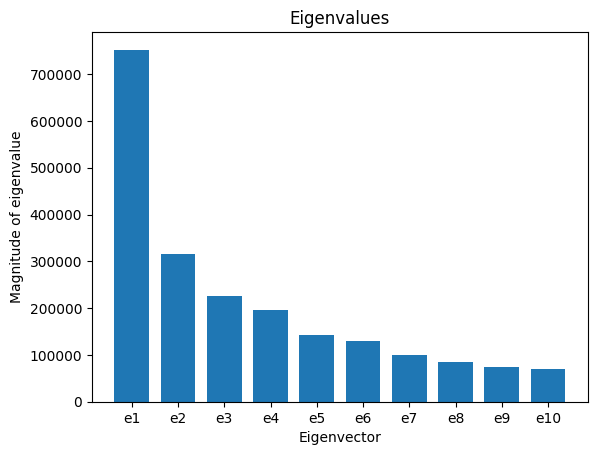

In [6]:
# first 10 eigenvalues
plt.bar(["e" + str(i+1) for i in range(10)], np.real(S_eig_vals_sorted[:10]), width=0.75)
plt.title("Eigenvalues")
plt.ylabel("Magnitude of eigenvalue")
plt.xlabel("Eigenvector")
plt.show()

In [7]:
U=S_eig_vecs_sorted # 784 x 784
# print(U.shape, centralized_dataMatrix.shape)
Y= U.T @ centralized_dataMatrix.T  # 784 x 784  x  784 x 12893
# print(Y.shape)
reconstructed_dataMatrix= U @ Y
print("Shape of reconstructed matrix:",reconstructed_dataMatrix.shape)

reconstructed_dataMatrix_T=reconstructed_dataMatrix.transpose()
# print(reconstructed_dataMatrix_T.shape)
# print(X_centralized.shape)
mse=0
for i in range(18623):
  for j in range(784):
    mse+=(reconstructed_dataMatrix_T[i][j]-centralized_dataMatrix[i][j])**2

print("Mean squared error:",np.real(mse)) #mse is close to zero


Shape of reconstructed matrix: (784, 18623)
Mean squared error: 1.180218123843457e-14


In [8]:
#take first 10 eigen vectors
Up=U[:,:10]
Yp=Up.T @ centralized_dataMatrix.T
print(Yp.shape)
# new_data=Up@Yp
# print(new_data.shape)
# new_data=new_data.T
# for i in range(18623):
#   new_data[i]=new_data[i]+data_matrix_mean
# new_reshaped=np.abs(np.real(new_data.reshape(18623,28,28)))
# rounded_d= new_reshaped.astype(np.uint8)
# for i in range(20):
#   display(Image.fromarray(rounded_d[i]))

data_matrix= Yp.T
data_matrix=data_matrix/255
print("Reduced data matrix shape:",data_matrix.shape)

(10, 18623)
Reduced data matrix shape: (18623, 10)


In [9]:
data_matrix=np.real(data_matrix)
print(data_matrix.shape)
print(y_training.shape)
print(data_matrix)
print(y_training)

(18623, 10)
(18623,)
[[-4.46819371 -2.30562719 -2.29138461 ... -0.43534952 -0.20762557
   0.03236219]
 [ 3.41183773  1.03678316 -0.80070694 ...  0.89875874 -0.25671653
   0.88807734]
 [-0.78832332  2.50183724 -1.57521276 ...  1.25991927  2.52840623
  -0.11401768]
 ...
 [-3.42105396 -1.37305021 -4.71123058 ... -1.270679   -1.62796394
   1.01553682]
 [ 0.32309651  1.73250075 -2.23520411 ... -0.55388041  0.65827618
  -0.95868261]
 [ 3.20182592 -0.39477996 -0.3697872  ...  0.32095889 -0.51223972
   1.00186117]]
[0 1 2 ... 0 2 1]


In [10]:
def probability(result, class_k):
  unique, counts = np.unique(result, return_counts=True)
  dict1=dict(zip(unique, counts))
  for i in range(3):
    if(i not in dict1.keys()):
      dict1[i]=0
  return dict1[class_k]/len(result)

In [11]:
def make_split(data,result,feature_index,means):
  data1=[]
  y_data1=[]
  data2=[]
  y_data2=[]
  for i in range(len(data)):
    if(data[i][feature_index]<=means[feature_index]):
      data1.append(data[i])
      y_data1.append(result[i])
    else:
      data2.append(data[i])
      y_data2.append(result[i])
  data1=np.array(data1)
  data2=np.array(data2)
  y_data1=np.array(y_data1)
  y_data2=np.array(y_data2)
  return [data1,y_data1,data2,y_data2]

In [12]:
print(data_matrix.shape)
print(data_matrix)
# print(np.mean(data_matrix.T,axis=0))
data_transpose=data_matrix.T
# print(data_matrix,axis=0)
means=np.mean(data_matrix,axis=0)
print(means)
# lst1=make_split(data_matrix,y_training,0,midpoints)
# print(lst1[2].shape)

(18623, 10)
[[-4.46819371 -2.30562719 -2.29138461 ... -0.43534952 -0.20762557
   0.03236219]
 [ 3.41183773  1.03678316 -0.80070694 ...  0.89875874 -0.25671653
   0.88807734]
 [-0.78832332  2.50183724 -1.57521276 ...  1.25991927  2.52840623
  -0.11401768]
 ...
 [-3.42105396 -1.37305021 -4.71123058 ... -1.270679   -1.62796394
   1.01553682]
 [ 0.32309651  1.73250075 -2.23520411 ... -0.55388041  0.65827618
  -0.95868261]
 [ 3.20182592 -0.39477996 -0.3697872  ...  0.32095889 -0.51223972
   1.00186117]]
[ 1.37354553e-16  9.15697023e-18 -1.14462128e-16  5.49418214e-17
  3.35755575e-17  7.47819235e-17 -2.38081226e-16  7.63080852e-17
  1.90770213e-18  9.53851066e-18]


In [13]:
total_gini=float('inf')
for i in range(10):
  lst=make_split(data_matrix,y_training,i,means)
  data1=lst[0]
  y_data1=lst[1]
  data2=lst[2]
  y_data2=lst[3]
  g1=0
  g2=0
  for j in range(3):
    g1+=probability(y_data1,j)*(1-probability(y_data1,j))
    g2+=probability(y_data2,j)*(1-probability(y_data2,j))
  total_G= len(y_data1)/18623*g1+len(y_data2)/18623*g2
  if(total_G<total_gini):
    total_gini=total_G
    best_split=(i,data1,y_data1,data2,y_data2,total_gini,means[i])

print(best_split)

(0, array([[-4.46819371, -2.30562719, -2.29138461, ..., -0.43534952,
        -0.20762557,  0.03236219],
       [-0.78832332,  2.50183724, -1.57521276, ...,  1.25991927,
         2.52840623, -0.11401768],
       [-0.29207362,  2.40388882,  0.14279811, ..., -1.34164105,
         1.12939073,  1.29402287],
       ...,
       [-1.5939225 ,  1.45357366, -2.89914132, ..., -1.00184876,
         1.04260997, -0.42829906],
       [-1.67616801,  3.08964901, -3.37505356, ..., -0.53508284,
         1.36070147, -2.35068814],
       [-3.42105396, -1.37305021, -4.71123058, ..., -1.270679  ,
        -1.62796394,  1.01553682]]), array([0, 2, 2, ..., 2, 2, 0], dtype=uint8), array([[ 3.41183773,  1.03678316, -0.80070694, ...,  0.89875874,
        -0.25671653,  0.88807734],
       [ 3.10992229, -1.93871143,  0.64587146, ...,  2.11406798,
        -0.92939233,  0.78596333],
       [ 3.34801573, -2.74136207, -0.01356403, ...,  1.39833748,
        -0.26316547,  0.53513874],
       ...,
       [ 2.80189138,  1.2

In [14]:
split_left=best_split[1]
left_labels=best_split[2]
split_right=best_split[3]
right_labels=best_split[4]
print(split_left.shape)
print(split_right.shape)
# print(left_labels)
means_left=np.mean(split_left,axis=0)
means_right=np.mean(split_right,axis=0)
print(means_right)

total_gini_left=float('inf')
total_gini_right=float('inf')
for i in range(10):
  lst1=make_split(split_left,left_labels,i,means_left)
  lst2=make_split(split_right,right_labels,i,means_right)
  left_g1=0
  left_g2=0
  right_g1=0
  right_g2=0
  for j in range(3):
    left_g1+=probability(lst1[1],j)*(1-probability(lst1[1],j))
    left_g2+=probability(lst1[3],j)*(1-probability(lst1[3],j))
    right_g1+=probability(lst2[1],j)*(1-probability(lst2[1],j))
    right_g2+=probability(lst2[3],j)*(1-probability(lst2[3],j))
  total_G_left=len(lst1[1])/len(split_left)*left_g1 + len(lst1[3])/len(split_left)*left_g2
  total_G_right=len(lst2[1])/len(split_right)*right_g1 + len(lst2[3])/len(split_right)*right_g2
  if(total_G_left<total_gini_left):
    total_gini_left=total_G_left
    best_left=(i,lst1[0],lst1[1],lst1[2],lst1[3],total_gini_left,means_left[i])
  if(total_G_right<total_gini_right):
    total_gini_right=total_G_right
    best_right=(i,lst2[0],lst2[1],lst2[2],lst2[3],total_gini_right,means_right[i])

print(best_left)
print(best_right)

if(total_gini_left<=total_gini_right):
  best2=best_left
else:
  best2=best_right

print(best2)
print(best2[1].shape)
print(best2[3].shape)

(8622, 10)
(10001, 10)
[ 2.76436256e+00 -1.30199803e-01  1.30926263e-01  7.24113497e-02
 -6.42633790e-02 -1.19408889e-01  1.57031125e-03  6.76321773e-02
 -7.82689074e-02  4.83282489e-02]
(1, array([[-4.46819371, -2.30562719, -2.29138461, ..., -0.43534952,
        -0.20762557,  0.03236219],
       [-4.48346948, -2.44019965, -2.35772182, ...,  0.06489314,
        -0.5487214 ,  0.20648896],
       [-6.74931439, -2.66784675,  0.03478418, ...,  1.95243649,
         1.98308485, -1.37627705],
       ...,
       [-2.09043231, -0.65231245, -4.35486961, ..., -1.04774109,
        -2.53021019,  0.35622575],
       [-3.49461402, -0.67574721, -5.50196035, ..., -1.21791295,
        -0.70197899, -0.5252573 ],
       [-3.42105396, -1.37305021, -4.71123058, ..., -1.270679  ,
        -1.62796394,  1.01553682]]), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([[-0.78832332,  2.50183724, -1.57521276, ...,  1.25991927,
         2.52840623, -0.11401768],
       [-0.29207362,  2.40388882,  0.14279811, ...

In [15]:
x_test=data["x_test"]
y_test=data["y_test"]
# x_test-=data_matrix_mean
print(x_test.shape)
print(y_test.shape)
X_TEST=[]
Y_TEST=[]
for i in range(len(x_test)):
  if(y_test[i]==0 or y_test[i]==1 or y_test[i]==2):
    X_TEST.append(x_test[i])
    Y_TEST.append(y_test[i])

X_TEST=np.array(X_TEST)
Y_TEST=np.array(Y_TEST)
print(X_TEST.shape)
print(Y_TEST.shape)

X_TEST=X_TEST.reshape(3147,28*28)
X_TEST=X_TEST-data_matrix_mean
X_TEST=(Up.T@X_TEST.T).T/255

print(X_TEST.shape)
print(X_TEST)

(10000, 28, 28)
(10000,)
(3147, 28, 28)
(3147,)
(3147, 10)
[[ 0.55949759+0.j  0.44984454+0.j  1.9135325 +0.j ... -1.01232523+0.j
  -4.08140947+0.j -1.20306387+0.j]
 [ 3.82194276+0.j -1.58229886+0.j -0.38360262+0.j ... -1.91640453+0.j
   0.48083695+0.j -0.35998664+0.j]
 [-4.81397555+0.j -0.69984784+0.j -0.29271076+0.j ... -0.75306049+0.j
   0.300517  +0.j  1.27765697+0.j]
 ...
 [-5.80593216+0.j -0.99002706+0.j -2.3378169 +0.j ...  2.0181619 +0.j
  -2.04842759+0.j -0.86243728+0.j]
 [ 4.20323699+0.j -0.65208724+0.j -0.6211377 +0.j ... -1.18322324+0.j
   0.68068247+0.j -1.05905256+0.j]
 [-0.3949179 +0.j  4.75703789+0.j  3.29269005+0.j ...  0.05935414+0.j
   0.71990084+0.j  2.05442676+0.j]]


In [16]:
#Finding classifiers in respective regions
def return_prediction(sample):
  if(sample[best_split[0]]<=best_split[6]):
      return np.bincount(best_split[2]).argmax()
  else:
    if(sample[best2[0]]<=best2[6]):
      return np.bincount(best2[2]).argmax()
    else:
      return np.bincount(best2[4]).argmax()


In [17]:
results=[]

for i in range(len(X_TEST)):
  results.append(return_prediction(X_TEST[i]))

results=np.array(results)
print(results.shape)
print(results)


(3147,)
[2 1 0 ... 0 1 0]


Accuracy: 80.90244677470608 %
[[971, 0, 9], [1, 1025, 109], [460, 22, 550]]
Accuracy of class 0: 99.08163265306122
Accuracy of class 1: 90.30837004405286
Accuracy of class 2: 53.29457364341085


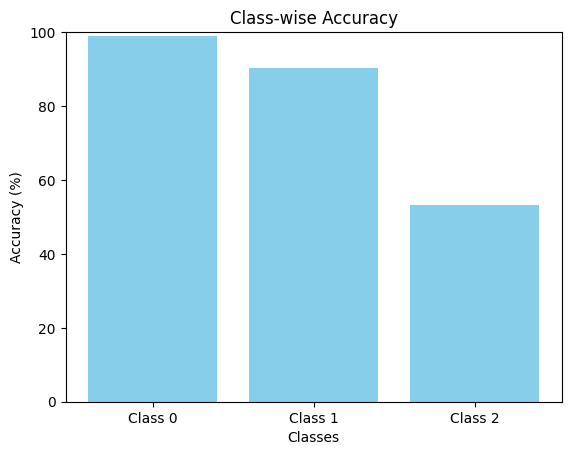

In [18]:
count=0
confusion_matrix=[[0 for i in range(3)] for i in range(3)]
# print(confusion_matrix)
for i in range(len(results)):
  confusion_matrix[Y_TEST[i]][results[i]]+=1
  if(results[i]==Y_TEST[i]):
    count+=1


print("Accuracy: {} %".format(count/len(results)*100))
print(confusion_matrix)
# print((258+1056+991)/3147*100)

# print(np.sum(confusion_matrix[0]))
print("Accuracy of class 0:",(confusion_matrix[0][0])/np.sum(confusion_matrix[0])*100)
print("Accuracy of class 1:",(confusion_matrix[1][1])/np.sum(confusion_matrix[1])*100)
print("Accuracy of class 2:",(confusion_matrix[2][2])/np.sum(confusion_matrix[2])*100)

class_accuracy = [confusion_matrix[i][i] / np.sum(confusion_matrix[i]) * 100 for i in range(len(confusion_matrix))]
plt.bar(['Class 0', 'Class 1', 'Class 2'], class_accuracy, color='skyblue')
plt.title('Class-wise Accuracy')
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

## BAGGING

In [19]:
def return_tree(dataset,result):
  means=np.mean(dataset,axis=0)
  # print(means)
  total_gini=float('inf')
  for i in range(len(dataset[0])):
    # print(i)
    d1,y1,d2,y2=make_split(dataset,result,i,means)
    g1=0
    g2=0
    for j in range(3):
      g1+=probability(y1,j)*(1-probability(y1,j))
      g2+=probability(y2,j)*(1-probability(y2,j))
    total_G= len(y1)/len(dataset)*g1+len(y2)/len(dataset)*g2
    # print(total_G)
    if(total_G<total_gini):
      total_gini=total_G
      best_split_1=(i,d1,y1,d2,y2,total_gini,means[i])

  # print(best_split_1)
  left_data=best_split_1[1]
  left_data_labels=best_split_1[2]
  right_data=best_split_1[3]
  right_data_labels=best_split_1[4]
  gini_left_side=float('inf')
  gini_right_side=float('inf')
  left_means=np.mean(left_data,axis=0)
  right_means=np.mean(right_data,axis=0)
  # print(left_means)
  # print(right_means)
  for i in range(len(left_data[0])):
    # print(i)
    left_d1,left_y1,left_d2,left_y2=make_split(left_data,left_data_labels,i,left_means)
    right_d1,right_y1,right_d2,right_y2=make_split(right_data,right_data_labels,i,right_means)
    left_gini_1=0
    left_gini_2=0
    right_gini_1=0
    right_gini_2=0
    for j in range(3):
      left_gini_1+=probability(left_y1,j)*(1-probability(left_y1,j))
      left_gini_2+=probability(left_y2,j)*(1-probability(left_y2,j))
      right_gini_1+=probability(right_y1,j)*(1-probability(right_y1,j))
      right_gini_2+=probability(right_y2,j)*(1-probability(right_y2,j))
    tot_left= len(left_y1)/len(best_split_1[1])*left_gini_1+len(left_y2)/len(best_split_1[1])*left_gini_2
    tot_right=len(right_y1)/len(best_split_1[3])*right_gini_1+len(right_y2)/len(best_split_1[3])*right_gini_2
    if(tot_left<gini_left_side):
      gini_left_side=tot_left
      best_split_l=(i,left_d1,left_y1,left_d2,left_y2,gini_left_side,left_means[i],"l")
    if(tot_right<gini_right_side):
      gini_right_side=tot_right
      best_split_r=(i,right_d1,right_y1,right_d2,right_y2,gini_right_side,right_means[i],"r")

  # print(best_split_l)
  # print(best_split_r)
  if(gini_left_side<=gini_right_side):
    best_split_2=best_split_l
  else:
    best_split_2=best_split_r

  # print(best_split_2)
  return [best_split_1,best_split_2]

# return_tree(data_matrix,y_training)

In [20]:
print(reshaped_matrix)
print(y_training)
print(reshaped_matrix.shape)
print(y_training.shape)

#splitting intoo five
DATASET={0:[],1:[],2:[],3:[],4:[]}
MEAN784={0:0,1:0,2:0,3:0,4:0}
MEAN10={0:0,1:0,2:0,3:0,4:0}
S={0:[],1:[],2:[],3:[],4:[]}
UP={0:[],1:[],2:[],3:[],4:[]}
TRAINING_RESULT={0:[],1:[],2:[],3:[],4:[]}

for i in range(18623):
  for j in range(5):
    num=random.randint(0,18622)
    DATASET[j].append(reshaped_matrix[num])
    TRAINING_RESULT[j].append(y_training[num])

# print(DATASET[0].shape)
# print(1/18622*)
for i in range(5):
  DATASET[i]=np.array(DATASET[i])
  TRAINING_RESULT[i]=np.array(TRAINING_RESULT[i])
  MEAN784[i]=np.mean(DATASET[i],axis=0)
  for j in range(len(DATASET[i])):
    DATASET[i][j]=np.subtract(DATASET[i][j],MEAN784[i])
  S[i]=1/18622*(DATASET[i].T @ DATASET[i])
#   # print(S[i].shape)
  S_eigvals,S_eigvectors= np.linalg.eig(S[i])
  idx = S_eigvals.argsort()[::-1]
  S_eig_vals_sorted = S_eigvals[idx]
  S_eig_vecs_sorted = S_eigvectors[:,idx]
  UP[i]=S_eig_vecs_sorted[:,:10]
  DATASET[i]=np.real(((UP[i].T @ DATASET[i].T ).T)/255)
  MEAN10[i]=np.mean(DATASET[i],axis=0)
  print(DATASET[i].shape)



for i in range(5):
  print(np.count_nonzero(TRAINING_RESULT[i]==0))
  print(np.count_nonzero(TRAINING_RESULT[i]==1))
  print(np.count_nonzero(TRAINING_RESULT[i]==2))
  print()

  # print(MEAN[i].shape)
  # print(DATASET[i].shape)
  # print(TRAINING_RESULT[i].shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 ... 0 2 1]
(18623, 784)
(18623,)
(18623, 10)
(18623, 10)
(18623, 10)
(18623, 10)
(18623, 10)
5913
6824
5886

6010
6701
5912

5965
6700
5958

5927
6682
6014

5943
6732
5948



In [21]:
print(np.real(MEAN10))
print(DATASET)
print(TRAINING_RESULT)
print(DATASET[0].shape)
print(TRAINING_RESULT[0].shape)

for i in range(5):
  best1,best2= return_tree(DATASET[i],TRAINING_RESULT[i])
  print(best1)
  print(best2)

{0: array([14.30383493,  1.24407758,  0.33981569,  0.22665933,  0.08459826,
       -0.50082372,  0.52352243,  0.19194506, -0.04658072, -0.05507763]), 1: array([14.22474245,  0.76387909,  0.18190755, -0.21581721,  0.04799944,
       -0.0972419 ,  0.18465056, -0.61513095, -0.23403059,  0.22580419]), 2: array([14.30471598, -0.99323793, -0.20185265,  0.03183256,  0.25193806,
        0.13553132,  0.21592203,  0.16158922, -0.554688  , -0.03417607]), 3: array([14.28516928,  1.22199608,  0.36710253,  0.14971957, -0.1317418 ,
       -0.06243908,  0.3299037 , -0.06463479, -0.35329937, -0.25666023]), 4: array([14.25385206,  1.26695435, -0.15409133,  0.62032355, -0.03134482,
        0.22899623,  0.02024118, -0.06367003,  0.11724188,  0.18284202])}
{0: array([[ 1.41660895e+01,  1.26001261e+00,  3.11267641e-01, ...,
         1.94821233e-01,  1.87695556e-02, -6.32515263e-02],
       [ 1.48706204e+01,  1.16207998e+00,  3.13833339e-01, ...,
         1.24302650e-01,  9.49259179e-03, -4.01004900e-03],
  

In [22]:
def bagging_prediction(sample,best1,best2):
  if(best2[7]=="r"):
    if(sample[best1[0]]<=best1[6]):
      # print(np.bincount(best1[2]).argmax())
      return np.bincount(best1[2]).argmax()
    else:
      if(sample[best2[0]]<=best2[6]):
        # print(np.bincount(best2[2]).argmax())
        return np.bincount(best2[2]).argmax()
      else:
        # print(np.bincount(best2[4]).argmax())
        return np.bincount(best2[4]).argmax()
  else:
    if(sample[best1[0]]<=best1[6]):
      if(sample[best2[0]]<=best2[6]):
        # print(np.bincount(best2[2]).argmax())
        return np.bincount(best2[2]).argmax()
      else:
        # print(np.bincount(best2[4]).argmax())
        return np.bincount(best2[4]).argmax()
    else:
      # print(np.bincount(best1[4]).argmax())
      return np.bincount(best1[4]).argmax()

In [ ]:
X_TEST=[]
Y_TEST=[]
for i in range(len(x_test)):
  if(y_test[i]==0 or y_test[i]==1 or y_test[i]==2):
    X_TEST.append(x_test[i])
    Y_TEST.append(y_test[i])

X_TEST=np.array(X_TEST)
Y_TEST=np.array(Y_TEST)
X_TEST=X_TEST.reshape(3147,784)
print(X_TEST.shape)
print(Y_TEST.shape)
DICT_TEST={0:0,1:0,2:0,3:0,4:0}
DICT_TESTRESULT={0:0,1:0,2:0,3:0,4:0}
for i in range(5):
  DICT_TEST[i]=np.copy(X_TEST)
  DICT_TEST[i]=np.subtract(DICT_TEST[i],MEAN784[i])
  DICT_TESTRESULT[i]=np.copy(Y_TEST)
  DICT_TEST[i]=(UP[i].T@DICT_TEST[i].T).T/255
  print(DICT_TEST[i].shape)


print(DICT_TEST)
print(DICT_TESTRESULT)



# for i in range(5):
#   DICT_TEST[i]=np.subtract(X_TEST,MEAN784[i])
#   DICT_TEST[i]=(UP[i].T@X_TEST.T).T/255
#   print(DICT_TEST[i].shape)
#   DICT_TESTRESULT[i]=Y_TEST
#   print(DICT_TESTRESULT[i].shape)

# print(DICT_TEST[0].shape)


(3147, 784)
(3147,)
(3147, 10)
(3147, 10)
(3147, 10)
(3147, 10)
(3147, 10)
{0: array([[ 0.46386698,  0.07110652,  0.10921698, ..., -0.63912109,
         0.27568281, -0.02745664],
       [-2.67548126,  0.7973997 ,  0.18173934, ...,  0.05463574,
         0.25089184, -0.22209138],
       [ 1.81068634, -0.4616805 ,  0.21072778, ...,  0.3000197 ,
        -0.33303239,  0.43863614],
       ...,
       [ 4.74611988, -1.13160588,  0.461656  , ...,  0.39724402,
         0.40005849,  0.26329576],
       [-1.46281166,  0.34302745,  0.33243344, ...,  0.05695455,
         0.23936844,  0.03852897],
       [ 2.10133892, -0.73010144, -0.14324239, ..., -0.0350699 ,
        -0.5084753 ,  0.28158653]]), 1: array([[ 0.42882141,  0.1001191 ,  0.25577586, ..., -0.11726117,
         0.0590368 ,  0.00901864],
       [-2.69116624,  0.78947086,  0.06868751, ..., -0.08958929,
        -0.04430171, -0.06579207],
       [ 1.80769959, -0.76259457, -0.09236775, ...,  0.35104609,
        -0.24184874,  0.37872617],
    

In [ ]:
RESULTS={0:[],1:[],2:[],3:[],4:[]}
for i in range(5):
  best1,best2=return_tree(DATASET[i],TRAINING_RESULT[i])
  # print(best1)
  # print(best2)
  # print(bagging_prediction(DICT_TEST[i][100],best1,best2))
  for j in range(3147):
    RESULTS[i].append(bagging_prediction(DICT_TEST[i][j],best1,best2))

for i in RESULT






1.0
